# Importing and Visualization

In [81]:
#Import Modules

import pandas as pd
#import pandas_profiling
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


#SKLearn, Need to specify where the function "lives" before importing it

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.tree import plot_tree

#helpers
%matplotlib inline

#Import Data Set using Pandas (default data structure in Pandas is called Dataframe)

In [2]:
data = pd.read_csv('Demographic_Data.csv')

#View a quick sample by checking the first 5 rows of the data frame

In [3]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
#You can view more records b y adding number inside parenthesis
data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
1,0,35,2,219.5100,2
2,1,45,3,1525.7000,4
3,1,46,3,715.2500,3
4,1,33,4,1937.5000,1
5,0,24,3,1314.2000,4
6,0,43,6,8.5472,2
7,1,66,5,819.9800,3
8,1,51,5,908.3100,1
9,1,47,3,767.5400,1


#Column names

In [5]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

#Understand the makeup of the data, understand which values are numeric or nominal

In [6]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


#Check the data types of each variable

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


# Data Cleaning

#Check for Duplicate Rows

In [8]:
data = data.drop_duplicates()

#Check to see if anything was dropped

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


#Understand the makeup of the data after duplicates dropped

In [10]:
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


#Check for Missing Values, print the sum

In [11]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


#Check all Datatypes are numeric

In [12]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

#Check in-store column only contains two unique values

In [13]:
data['in-store'].nunique()

2

#Check region column only contains four unique values

In [14]:
data['region'].nunique()

4

# Visualizing the Data

#Import the matplotlib library (contains most of the major visualizations we'll be using)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#Make sure we know the column names in dataframe

In [16]:
header =data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


#Build Histogram for each variable

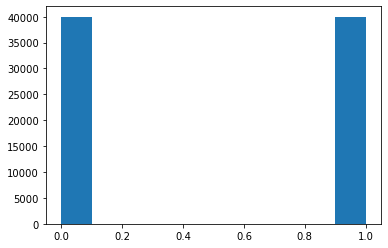

In [17]:
plt.hist(data['in-store'])
plt.show()

(array([39989.,     0.,     0., 39990.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

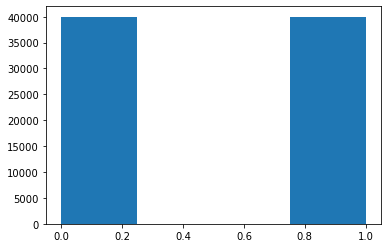

In [18]:
plt.hist(data['in-store'], bins=4)

(array([22446., 29715., 19846.,  7972.]),
 array([18.  , 34.75, 51.5 , 68.25, 85.  ]),
 <BarContainer object of 4 artists>)

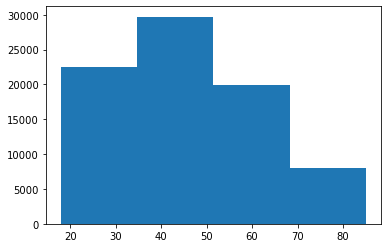

In [19]:
plt.hist(data['age'], bins=4)

(array([16983., 23080., 22752., 17164.]),
 array([1.  , 2.75, 4.5 , 6.25, 8.  ]),
 <BarContainer object of 4 artists>)

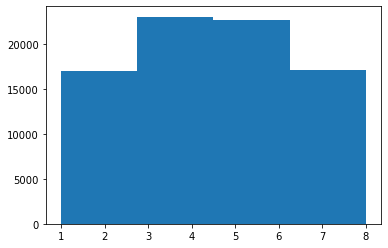

In [20]:
plt.hist(data['items'], bins=4)

(array([46593., 18038., 10315.,  5033.]),
 array([   5.0047  ,  753.753525, 1502.50235 , 2251.251175, 3000.      ]),
 <BarContainer object of 4 artists>)

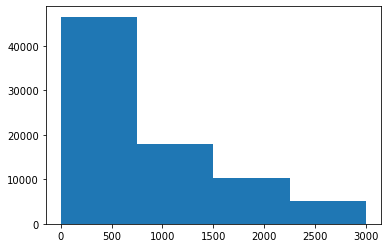

In [21]:
plt.hist(data['amount'], bins=4)

(array([15997., 19994., 18000., 25988.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

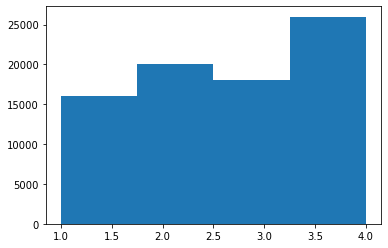

In [22]:
plt.hist(data['region'], bins=4)

#Line Plot Example

In [23]:
import numpy as np

In [24]:
#Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

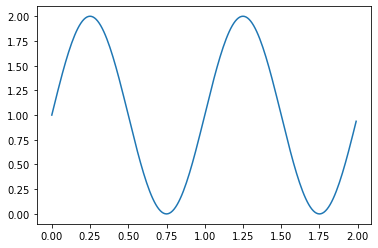

In [25]:
fig, ax = plt.subplots ()
ax.plot(t,s)
plt.show()

#Scatter Plots

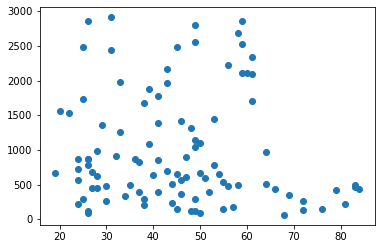

In [26]:
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

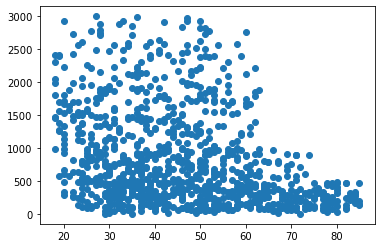

In [27]:
data_sample = data.sample(1000)
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='age', ylabel='amount'>

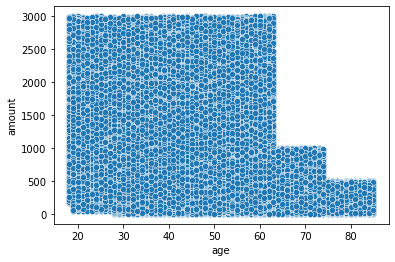

In [28]:
sns.scatterplot(data=data, x="age", y="amount")

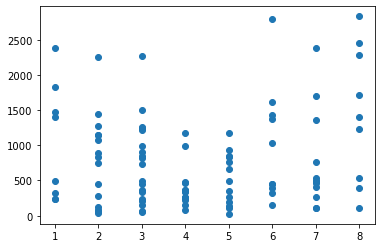

In [29]:
data_sample = data.sample(100)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

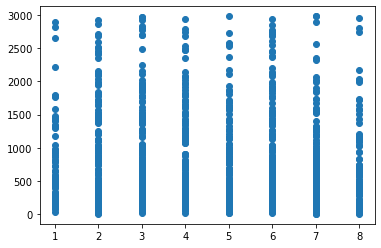

In [30]:
data_sample = data.sample(1000)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='items', ylabel='amount'>

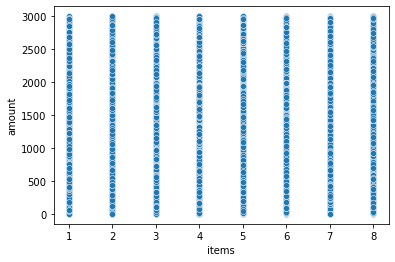

In [31]:
sns.scatterplot(data=data, x="items", y="amount")

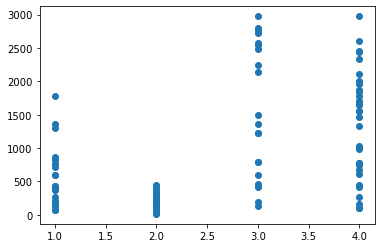

In [32]:
data_sample = data.sample(100)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

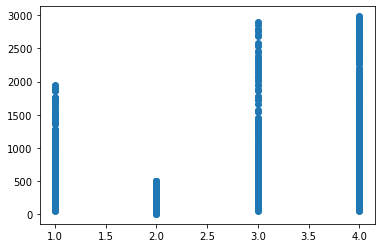

In [33]:
data_sample = data.sample(1000)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='region', ylabel='amount'>

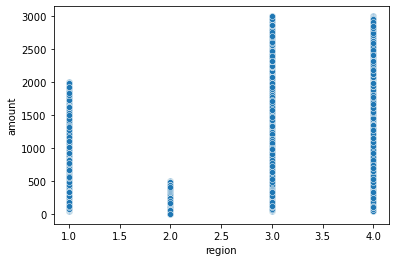

In [34]:
sns.scatterplot(data=data, x="region", y="amount")

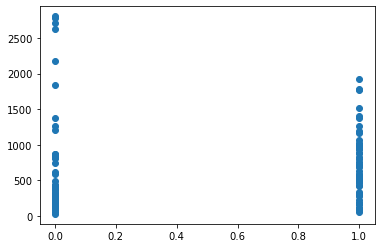

In [35]:
data_sample = data.sample(100)
x = data_sample['in-store']
y = data_sample['amount']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='in-store', ylabel='amount'>

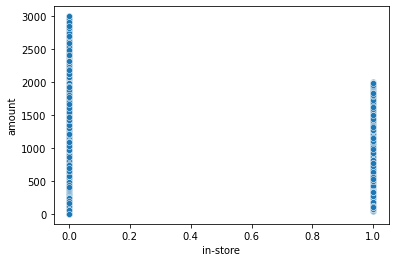

In [36]:
sns.scatterplot(data=data, x="in-store", y="amount")

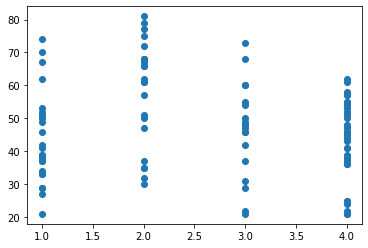

In [37]:
data_sample = data.sample(100)
x = data_sample['region']
y = data_sample['age']
plt.scatter(x,y, marker = 'o')
plt.show()

<AxesSubplot:xlabel='region', ylabel='age'>

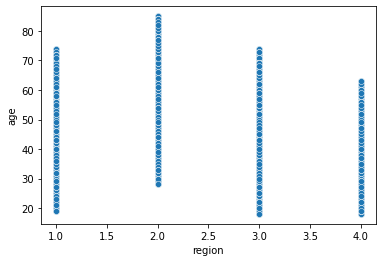

In [38]:
sns.scatterplot(data=data, x="region", y="age")

<AxesSubplot:xlabel='region', ylabel='in-store'>

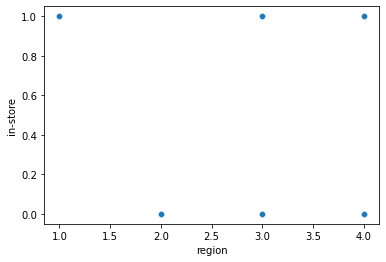

In [39]:
sns.scatterplot(data=data, x="region", y="in-store")

<AxesSubplot:xlabel='in-store', ylabel='age'>

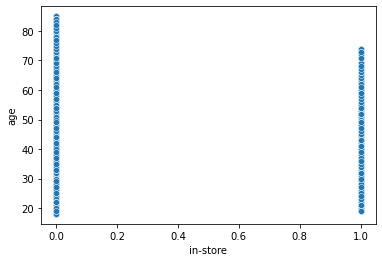

In [40]:
sns.scatterplot(data=data, x="in-store", y="age")

#Box Plots

In [41]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


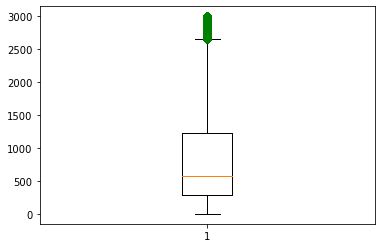

In [42]:
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

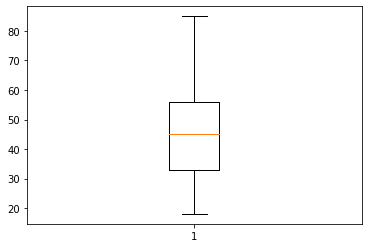

In [43]:
A = data['age']
plt.boxplot(A,0,'gD')
plt.show()

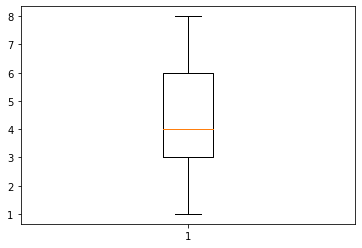

In [44]:
A = data['items']
plt.boxplot(A,0,'gD')
plt.show()

# Correlation

#Basic Correlation Coefficient Matrix - measure the strength of the relationship between each variable. 
Correlation Coefficients range between -1 and 1, with numbers closer to -1 defining a strong negative correlation, numbers closer to 1 defining a strong positive correlation and numbers closer to 0 meaning little to no correlation.

In [45]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [46]:
#Observations: 
#Weak negative correlation between Age and In-Store 
#Weak negative correlation between Region and In-Store
#Weak negative correlation between Age and Amount
#Weak negative correlation between Age and Region
#Moderate positive Correlation between Region and Amount

#Basic Covariance Matrix - measure how changes in one variable are associated with changes in a second variable.

In [47]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


In [48]:
# Total Transactions Per Region
transactioncount = data.groupby('region')['amount'].count()
print(transactioncount)

region
1    15997
2    19994
3    18000
4    25988
Name: amount, dtype: int64


C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


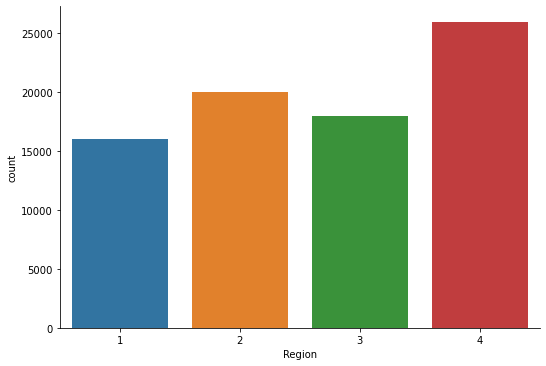

In [49]:
#Number of transaction by region
#count plots show the count of onservation in each categorical bin using bars
fg = sns.catplot('region', data=data,  kind='count', aspect=1.5)
fg.set_xlabels('Region')

In [50]:
# Total Amount Spent by Region
totalsum = data.groupby('region')['amount'].sum()
roundedsum = totalsum.round(2)
print(roundedsum)

region
1    11917620.05
2     5040442.24
3    16523453.47
4    33366990.02
Name: amount, dtype: float64


In [51]:
#Average Per Transaction by Region
avgpertransaction = roundedsum/transactioncount
print(avgpertransaction)

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64


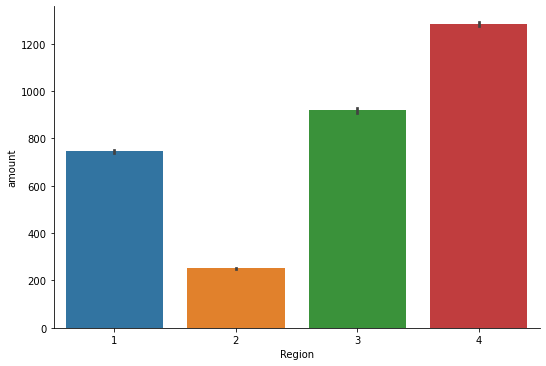

In [52]:
#average spent per transaction by region
#bar shows the Mean or Average
fg2 = sns.catplot(x = 'region', y = 'amount', data = data, kind = 'bar', aspect = 1.5)
fg2.set_xlabels('Region')

In [53]:
replace_region = {'region' : {1:'North', 2:'South', 3:'East', 4:'West'}}

In [54]:
data.replace(replace_region, inplace=True)
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,South
1,0,35,2,219.51,South
2,1,45,3,1525.70,West
3,1,46,3,715.25,East
4,1,33,4,1937.50,North


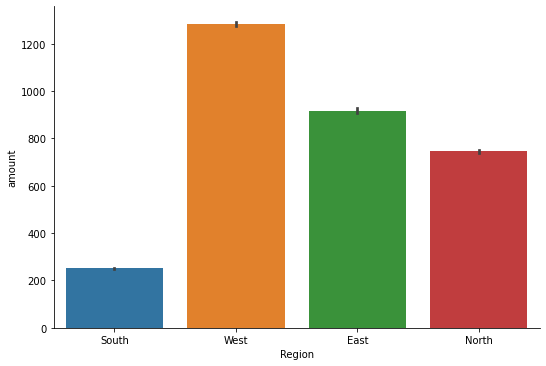

In [55]:
fg2 = sns.catplot(x = 'region', y = 'amount', data = data, kind = 'bar', aspect = 1.5)
fg2.set_xlabels('Region')

In [56]:
instorecount = data.groupby('age')['in-store'].count()
print(instorecount)

age
18     223
19     743
20    1009
21     937
22     975
      ... 
81     371
82     385
83     380
84     373
85     185
Name: in-store, Length: 68, dtype: int64


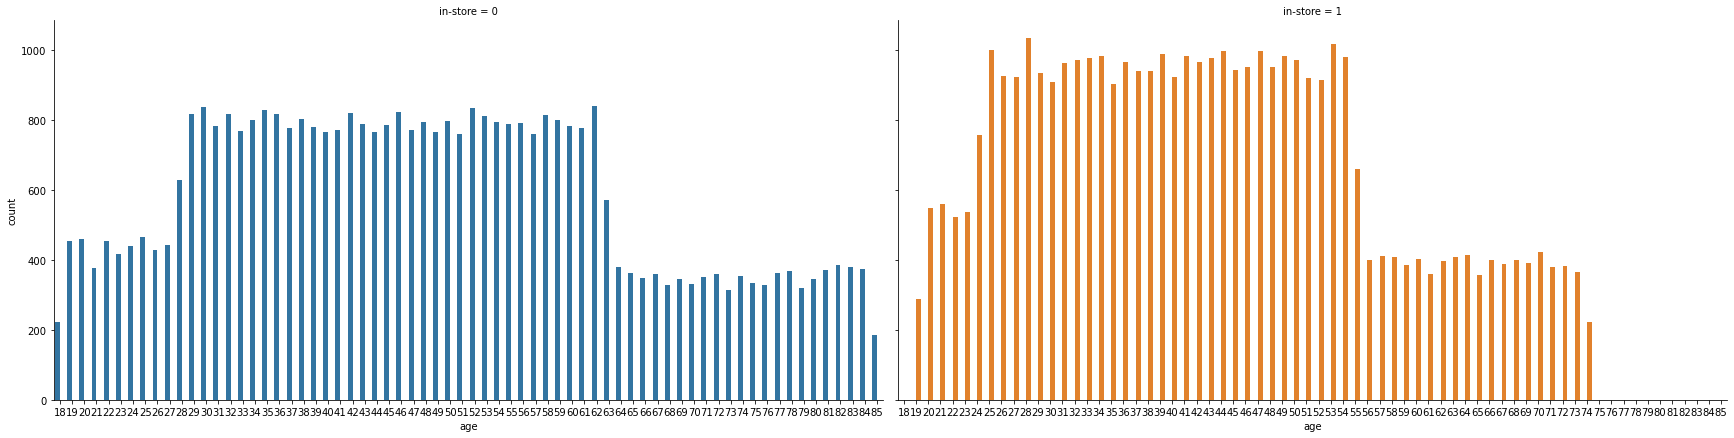

In [57]:
sns.catplot(x="age", hue="in-store", col="in-store",

                data=data, kind="count",

                height=6, aspect=2);

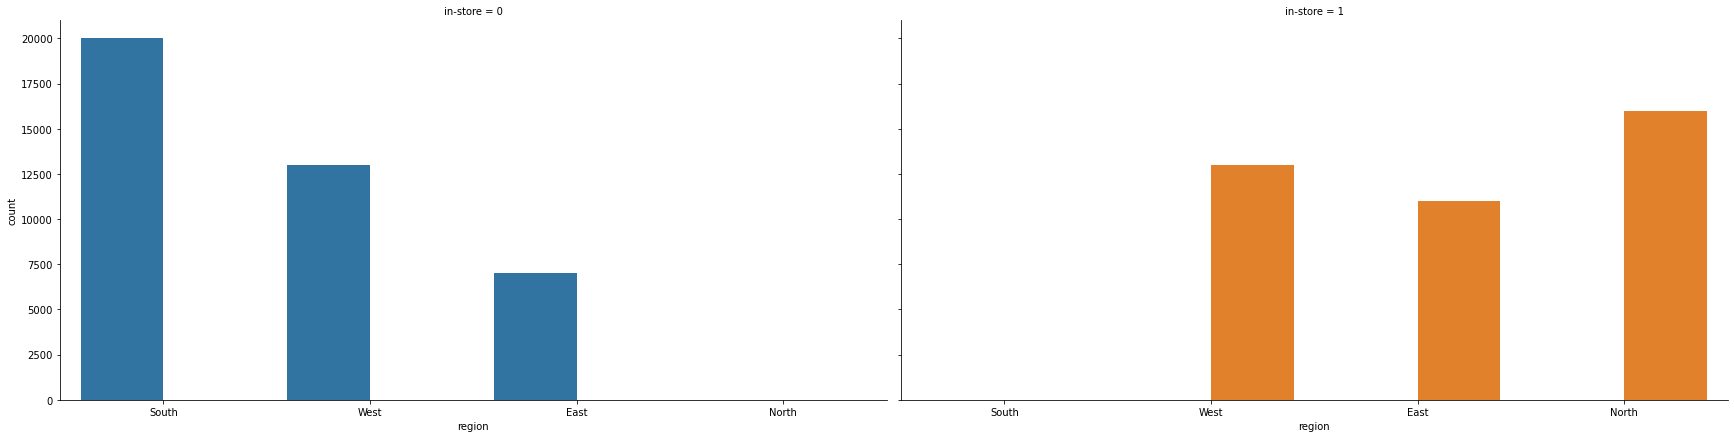

In [58]:
sns.catplot(x="region", hue="in-store", col="in-store",

                data=data, kind="count",

                height=6, aspect=2);

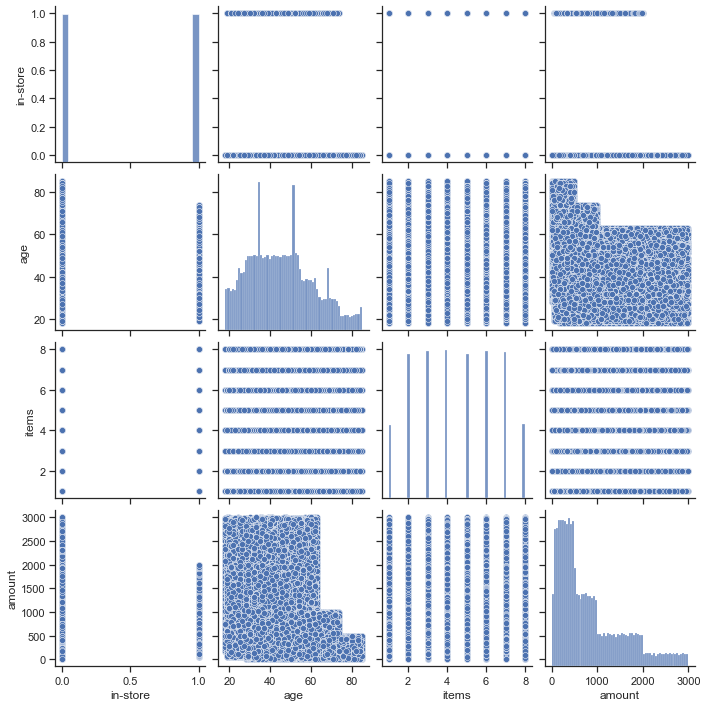

In [87]:
#scaterpolot matrix
sns.set(style="ticks", color_codes=True)
pairplot1 = sns.pairplot(data)
pairplot1

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 6.2+ MB


# Task 2

In [89]:
from sklearn.datasets import load_digits
print(digits.data)

NameError: name 'digits' is not defined

Selecting Data

In [62]:
# Slicing using the [] operator selects a set of rows or columns from a Data Frame. 
#To slice out a set of rows, use the following syntax data[start:stop]
#The start is included in the output; the stop bound is one beyond the row you want to select

#Example: Select rows 0, 1, 2 (row 3 is not selected)
data[0:3]

,in-store,age,items,amount,region
0,0,37,4,281.03,South
1,0,35,2,219.51,South
2,1,45,3,1525.70,West


In [64]:
#Select any given column, use pandas to select a column by its name:
justregion = data['region']
print(justregion)

0        South
1        South
2         West
3         East
4        North
         ...  
79995    North
79996     East
79997    South
79998    North
79999     East
Name: region, Length: 79979, dtype: object


In [69]:
#If we need to select a range of columns (e.g., to establish the feature space) 
#we can include a sub-selection within the column portion of the array as follows:

justafewcolumns = data.iloc[:,0:4]
print(justafewcolumns)

       in-store  age  items   amount
0             0   37      4   281.03
1             0   35      2   219.51
2             1   45      3  1525.70
3             1   46      3   715.25
4             1   33      4  1937.50
...         ...  ...    ...      ...
79995         1   71      3   558.82
79996         0   59      7  1932.00
79997         0   54      1   414.16
79998         1   49      4   335.32
79999         1   30      1   527.12

[79979 rows x 4 columns]


In [60]:
#Select the features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [61]:
#Select the dependent variable(what we want to study or predict)
y = data['region']

Training the Model

In [74]:
#1. Since you have already split your data into X and y components in the previous task, 
#lets now use the data and the train_test_split function of SciKit-Learn 
#to create the necessary training and testing data for our model as follows:

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [75]:
#2. Next, we'll instantiate (bring in a copy) the algorithm just as we did previously, 
#and we'll fit or apply the algorithm to our training sets to build the model as follows:

#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [76]:
#3. Now that you have a fully trained model, 
#you must use it on the testing set to make predictions before it can be assessed:

#Predictions
preds = model.predict(X_test)

In [77]:
#4. Finally, you can print out the classification report using the predictions you just made 
#and the ground truth or the actual values from the testing set to assess 
#the model with a given metric as follows:

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

        East       0.37      0.38      0.37      5391
       North       0.39      0.39      0.39      4838
       South       0.92      0.90      0.91      5979
        West       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



In [78]:
#5. Optional:If you'd like to visualize the decision tree built using DecisionTreeClassifier(), 
#you can use the following method for doing so; this will help you answer the question(s) 
#you've been asked for this task:
from sklearn.tree import plot_tree

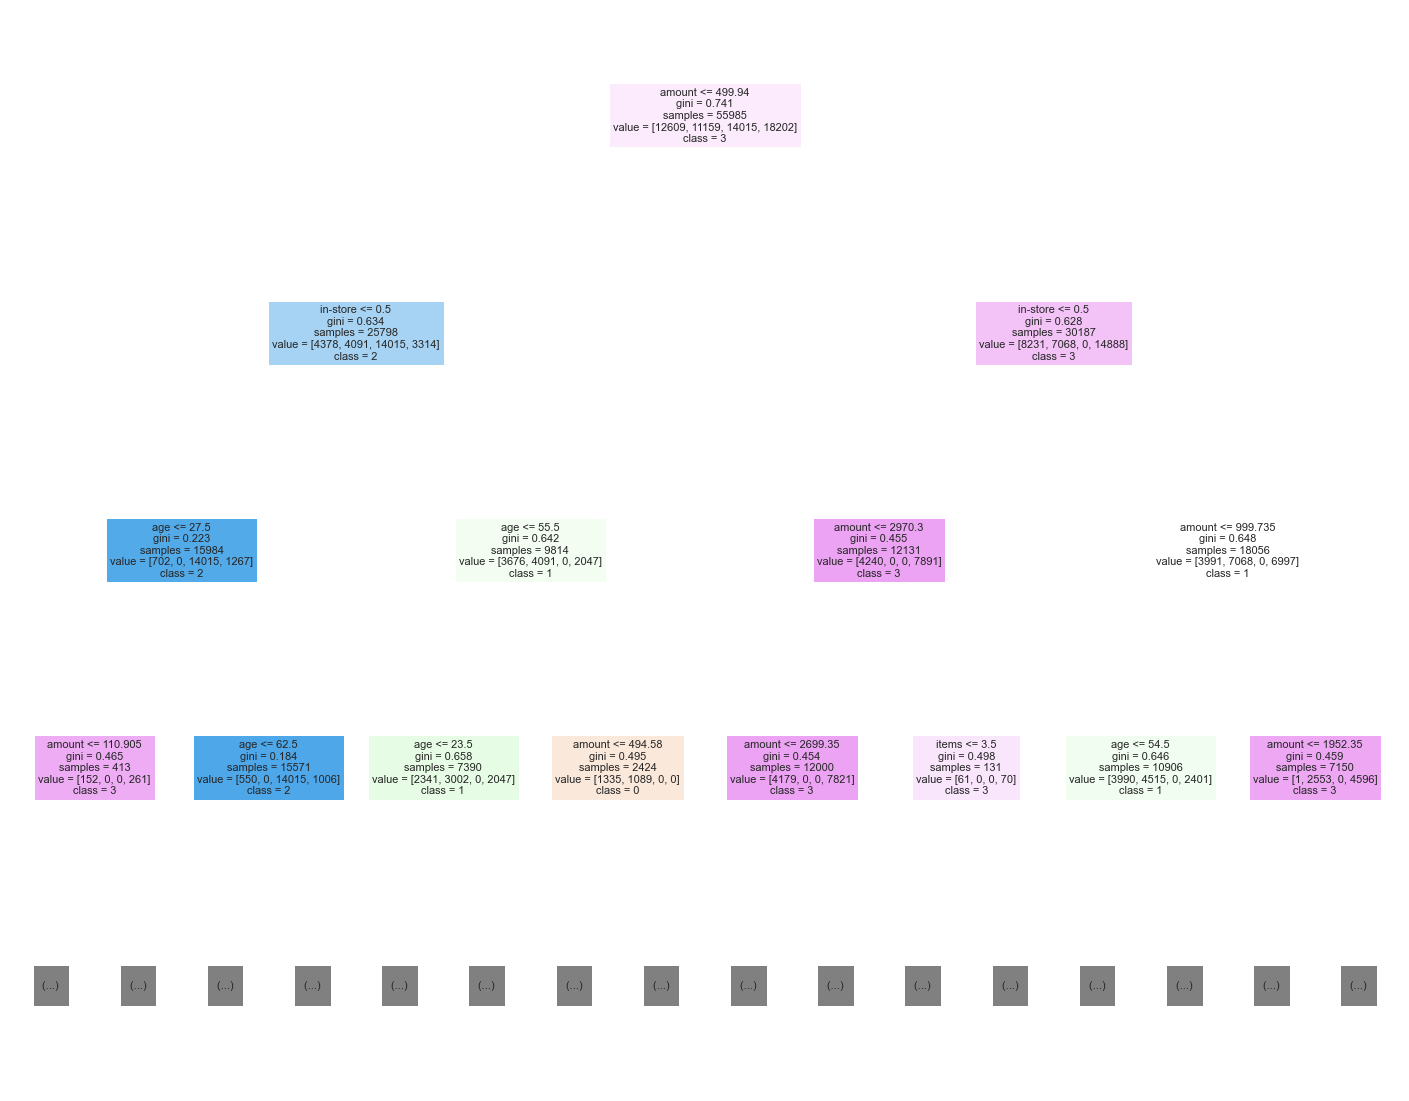

In [86]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, max_depth=3, feature_names=X.columns,
                 class_names=['0', '1', '2', '3'],filled=True,fontsize=11)